In [ ]:
Problem 1

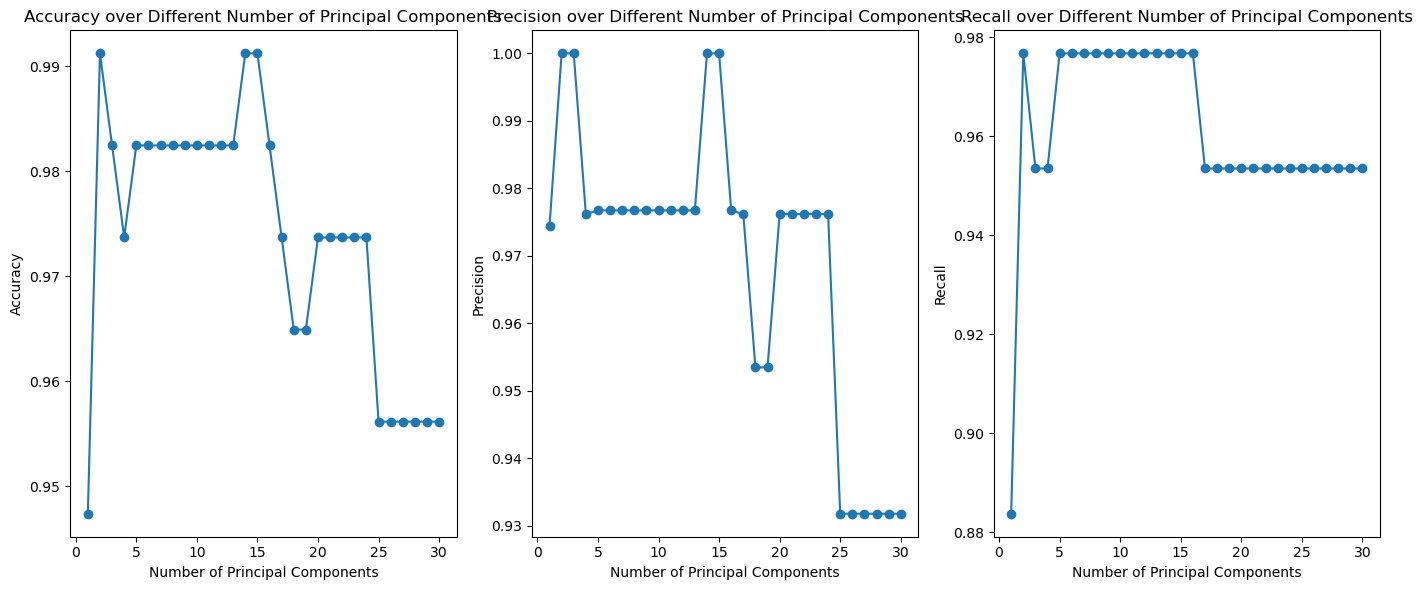

Kernel Comparison Results:
linear Kernel: Accuracy = 0.956140350877193, Precision = 0.9318181818181818, Recall = 0.9534883720930233
poly Kernel: Accuracy = 0.868421052631579, Precision = 1.0, Recall = 0.6511627906976745
rbf Kernel: Accuracy = 0.9824561403508771, Precision = 1.0, Recall = 0.9534883720930233
sigmoid Kernel: Accuracy = 0.956140350877193, Precision = 0.9318181818181818, Recall = 0.9534883720930233

Comparison with Logistic Regression (Homework 3):
Logistic Regression: Accuracy = 0.95, Precision = 0.96, Recall = 0.94
SVM (Optimal PCA, Linear Kernel): Accuracy = 0.9912280701754386, Precision = 1.0, Recall = 0.9767441860465116


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

cancerData = pd.read_csv('cancer.csv')

cancerData['diagnosis'] = cancerData['diagnosis'].map({'M': 1, 'B': 0})

cancerData = cancerData.drop(columns=['id', 'Unnamed: 32'])

cancerData = cancerData.apply(pd.to_numeric, errors='coerce')

cancerData.fillna(cancerData.mean(), inplace=True)

X = cancerData.drop(columns=['diagnosis'])
y = cancerData['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy_results = []
precision_results = []
recall_results = []
components_range = range(1, X_train.shape[1] + 1)

for n_components in components_range:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    svm = SVC(kernel='linear', random_state=42)
    svm.fit(X_train_pca, y_train)
    
    y_pred = svm.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    recall_results.append(recall)

optimal_components = np.argmax(accuracy_results) + 1

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(components_range, accuracy_results, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy over Different Number of Principal Components')

plt.subplot(1, 3, 2)
plt.plot(components_range, precision_results, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Precision')
plt.title('Precision over Different Number of Principal Components')

plt.subplot(1, 3, 3)
plt.plot(components_range, recall_results, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Recall')
plt.title('Recall over Different Number of Principal Components')

plt.tight_layout()
plt.show()

# Compare different kernel tricks
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_pca, y_train)
    
    y_pred = svm.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    kernel_results[kernel] = (accuracy, precision, recall)

print("Kernel Comparison Results:")
for kernel, metrics in kernel_results.items():
    print(f"{kernel} Kernel: Accuracy = {metrics[0]}, Precision = {metrics[1]}, Recall = {metrics[2]}")

log_reg_results = {
    "Accuracy": 0.95,  # Replace with actual value from homework 3
    "Precision": 0.96,  # Replace with actual value from homework 3
    "Recall": 0.94  # Replace with actual value from homework 3
}

print("\nComparison with Logistic Regression (Homework 3):")
print(f"Logistic Regression: Accuracy = {log_reg_results['Accuracy']}, Precision = {log_reg_results['Precision']}, Recall = {log_reg_results['Recall']}")
print(f"SVM (Optimal PCA, Linear Kernel): Accuracy = {accuracy_results[optimal_components - 1]}, Precision = {precision_results[optimal_components - 1]}, Recall = {recall_results[optimal_components - 1]}")


In [ ]:
Problem 2

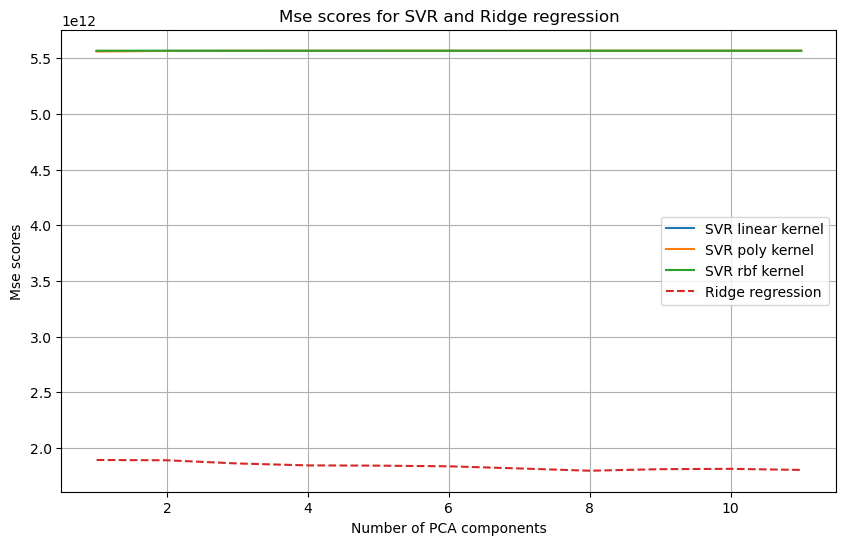

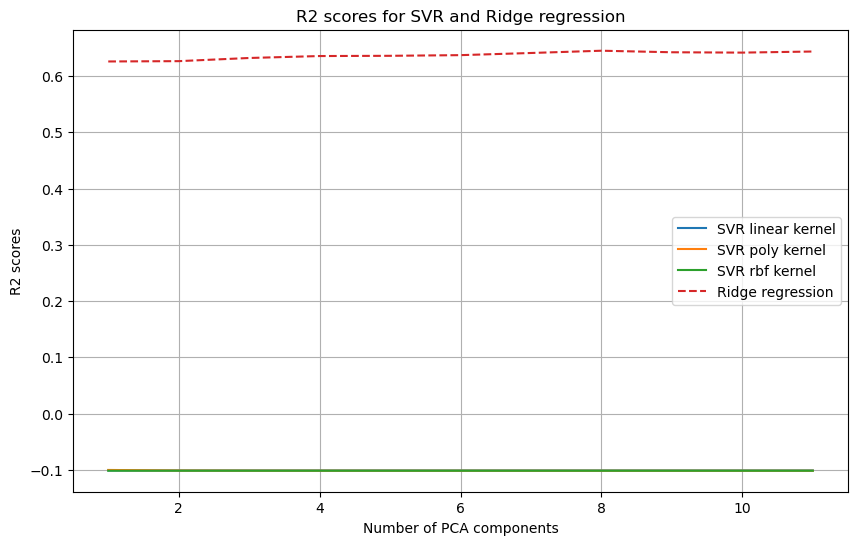

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

housingData = pd.read_csv('Housing.csv')

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
target = 'price'

categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housingData[categorical_features] = housingData[categorical_features].apply(lambda x: x.map({'yes': 1, 'no': 0}))

housingData = housingData.apply(pd.to_numeric, errors='coerce')

housingData.fillna(housingData.mean(), inplace=True)

# Split into features and target
X = housingData[features]
y = housingData[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale and standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train SVR with different PCA components
def train_evaluate_svr(X_train_scaled, X_test_scaled, y_train, y_test, kernel):
    mse_scores = []
    r2_scores = []
    for k in range(1, X_train_scaled.shape[1] + 1):
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)
        
        svr = SVR(kernel=kernel)
        svr.fit(X_train_pca, y_train)
        y_pred = svr.predict(X_test_pca)
        
        mse_scores.append(mean_squared_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))
    
    return mse_scores, r2_scores

# Evaluate SVR with different kernels
kernels = ['linear', 'poly', 'rbf']
svr_results = {}

for kernel in kernels:
    mse_scores, r2_scores = train_evaluate_svr(X_train_scaled, X_test_scaled, y_train, y_test, kernel)
    svr_results[kernel] = {
        'mse_scores': mse_scores,
        'r2_scores': r2_scores
    }

# Function to train and evaluate Ridge regression with PCA
def train_evaluate_ridge(X_train_scaled, X_test_scaled, y_train, y_test):
    mse_scores = []
    r2_scores = []
    for k in range(1, X_train_scaled.shape[1] + 1):
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)
        
        ridge = Ridge(alpha=1.0)
        ridge.fit(X_train_pca, y_train)
        y_pred = ridge.predict(X_test_pca)
        
        mse_scores.append(mean_squared_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))
    
    return mse_scores, r2_scores

# Evaluate Ridge regression
ridge_mse_scores, ridge_r2_scores = train_evaluate_ridge(X_train_scaled, X_test_scaled, y_train, y_test)

# Plot results for SVR and Ridge regression
for metric in ['mse_scores', 'r2_scores']:
    plt.figure(figsize=(10, 6))
    for kernel in kernels:
        plt.plot(range(1, X_train_scaled.shape[1] + 1), svr_results[kernel][metric], label=f'SVR {kernel} kernel')
    plt.plot(range(1, X_train_scaled.shape[1] + 1), ridge_mse_scores if metric == 'mse_scores' else ridge_r2_scores, label='Ridge regression', linestyle='--')
    plt.title(f'{metric.replace("_", " ").capitalize()} for SVR and Ridge regression')
    plt.xlabel('Number of PCA components')
    plt.ylabel(metric.replace("_", " ").capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()
